## Calculation of near-surface humidity from ERA5 

needed parameters: 

- 2m dew point temperature 
- surface pressure 

In [121]:
import numpy as np 
import xarray as xr

file = '../moisture_transport/moisture_transport/mean_flow/reanalysis-era5-single-levels-monthly-means_201908_surface_pressure-2m_dewpoint_temperature-total_column_water_vapour-10u-10v10-50-60-130.nc'

data = xr.open_dataset(file)
sp = data.sp[0]
temperature = data.d2m[0]

In [66]:
# define constants 

# gas constants for dry air and water vapour in J K-1 kg-1
Rdry= 287
Rvap= 461
# constants for Tetens formula (for saturation over water)
c1= 611.21
c2= 17.502
c3= 32.19
# freezing point
T0 = 273.16 

In [67]:
def get_surface_humidity(temperature, spressure):
    e_sat = c1* np.exp( c2 * ((temperature - T0)/ (temperature - c3)))
    
    q_sat = ((Rdry / Rvap) * e_sat ) / (spressure - (1- Rdry/Rvap) * e_sat )
    return e_sat, q_sat

In [69]:
e_sat, q_surface = get_surface_humidity(temperature.values, sp.values)

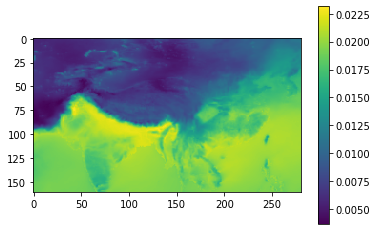

In [70]:
import matplotlib.pyplot as plt
plt.imshow(q_surface)
plt.colorbar()